<a href="https://colab.research.google.com/github/AyushRaman09/Deeplearning/blob/main/deeplearning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [2]:
import tensorflow as tf


In [3]:
print(tf.__version__)

2.15.0


In [4]:
## import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [5]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 14)

In [7]:
X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [8]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [10]:
## Feature engineering

geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [11]:
gender

,Male
0,False
1,False
2,False
3,False
4,False
...,...
9995,True
9996,True
9997,False
9998,True


In [12]:
X=X.drop(['Gender','Geography'],axis = 1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [38]:
X = pd.concat([X, geography,gender], axis = 1)
print(type(X))
X

<class 'pandas.core.frame.DataFrame'>


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True,True,False,True


In [14]:
#splitting the dataset

from sklearn.model_selection import train_test_split


In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0 )

In [39]:
print(type(X_train))

<class 'numpy.ndarray'>


In [40]:
from sklearn.preprocessing import StandardScaler


sc =StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
X_train.shape

(8000, 11)

In [24]:
# Creation of ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, ReLU, ELU, PReLU
from tensorflow.keras.layers import Dropout


In [25]:
## Initalzing the ANN

classifier =  Sequential()

In [26]:
# Adding Input layers
classifier.add(Dense(units=11,activation = 'relu'))

In [27]:
# Adding the hidden layer
classifier.add(Dense(units=6, activation='relu'))


In [28]:
#Adding 2nd hidden layer
classifier.add(Dense(units=4,activation='relu'))

In [29]:
# #Adding output layer hidden layer
classifier.add(Dense(1, activation='sigmoid'))

In [47]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [48]:
import tensorflow as tf
tf.keras.optimizers.Adam(learning_rate = 0.011)

In [55]:
##Early  stopping

early_stoppping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [49]:
type(X_train)

numpy.ndarray

In [56]:
model_history = classifier.fit(X_train,y_train,validation_split = 0.33, batch_size=10,epochs=1000, callbacks=early_stoppping)

Epoch 1/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.3155 - accuracy: 0.8699 - val_loss: 0.3602 - val_accuracy: 0.8508
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3150 - accuracy: 0.8716 - val_loss: 0.3613 - val_accuracy: 0.8512
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3146 - accuracy: 0.8701 - val_loss: 0.3603 - val_accuracy: 0.8508
Epoch 4/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3147 - accuracy: 0.8705 - val_loss: 0.3615 - val_accuracy: 0.8485
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3134 - accuracy: 0.8709 - val_loss: 0.3612 - val_accuracy: 0.8489
Epoch 6/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3131 - accuracy: 0.8724 - val_loss: 0.3615 - val_accuracy: 0.8497
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3139 - accuracy: 0.8735 - val_loss: 0.3618 - val_accuracy:

In [59]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

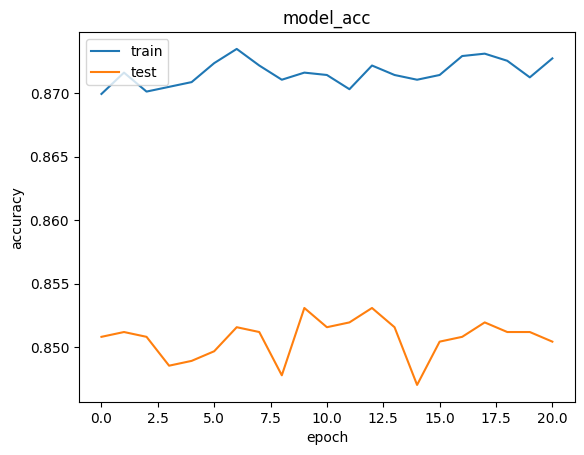

In [60]:
#history for accuracy for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

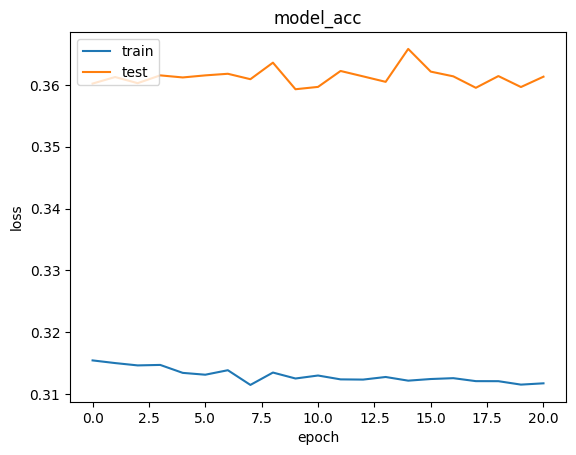

In [61]:
#history for accuracy for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_acc')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [62]:
prediction = classifier.predict(X_test)
prediction = (prediction >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [66]:
#make confusion matrix

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,prediction)
cm


array([[1508,   87],
       [ 206,  199]])

In [69]:
score = accuracy_score(y_test, prediction)
score*100


85.35000000000001

In [71]:
#get the weights

classifier.get_weights()

[array([[ 0.09276179,  0.0654555 ,  0.21316689, -0.03130113, -0.0081696 ,
          0.08606442,  0.4250105 , -0.0065459 ,  0.08922349, -0.18525192,
          0.17566474],
        [-0.66230094,  0.19469734, -0.4752879 , -0.18436179,  0.70222765,
         -0.27582085, -0.30147943,  0.94670576,  0.00323018, -1.1447624 ,
         -0.7388446 ],
        [ 0.30565792, -0.03648452, -0.11013105, -0.36021164,  0.12141029,
         -0.41479316,  0.12844913,  0.00715163, -0.00632529,  0.32714665,
         -0.01633331],
        [-0.03147803,  0.51125664, -0.7630361 ,  0.10886722, -0.16604978,
          0.11154302, -0.38895887,  0.00902795,  0.03503266, -0.4013131 ,
          0.04433236],
        [-0.1838906 , -0.19502978, -0.23764117, -0.15555099,  0.07177012,
          0.27586532,  1.1854709 , -0.74198157,  1.522112  ,  0.4884774 ,
          0.20509537],
        [ 0.2311403 , -0.12883191, -0.11602414, -0.10413339,  0.02641081,
          0.23932178,  0.04040813, -0.16339673, -0.08408983, -0.2366956